In [18]:
#Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import numpy as np

In [9]:
#Using images of pizza and steak - Food 101 dataset

#listing number of images
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [11]:
#another way to find image count
num_steak_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_train

750

In [17]:
train_data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in train_data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [38]:
#Visualising the images
def view_random_image(target_dir, target_class):
    target_folder = target_dir + "/" + target_class
    img_path = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+"/"+img_path[0])
    plt.imshow(img)
    print(img.shape)

(332, 512, 3)


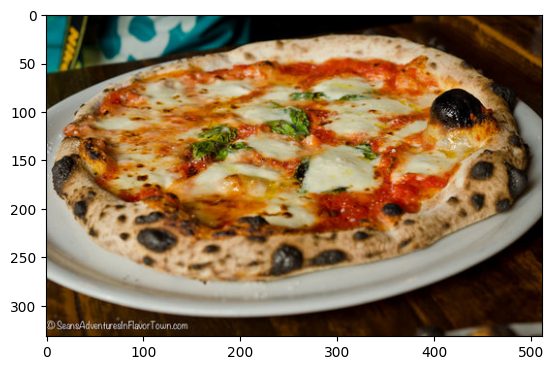

In [39]:
view_random_image("pizza_steak/train","pizza")

(512, 512, 3)


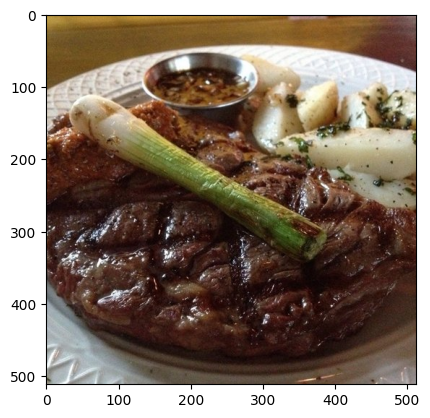

In [28]:
view_random_image("pizza_steak/train", "steak")

In [43]:
#BUILDING AN END-END CNN MODEL
tf.random.set_seed(42)

#Loading in the images
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir,
                                          target_size=(224,224), #(224,244) is more common and enough in practice
                                          batch_size=64,
                                          class_mode="binary")

validation_data = valid_gen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [48]:
#Building a CNN MODEL
#same as Tiny VGG
model_tiny_vgg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_tiny_vgg.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

history_tiny_vgg = model_tiny_vgg.fit(train_data,
                                     validation_data=validation_data,
                                     epochs=6,
                                     steps_per_epoch=len(train_data),
                                     validation_steps=len(validation_data))

Epoch 1/6


2023-08-14 21:23:14.688324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.5969 - accuracy: 0.6940

2023-08-14 21:23:17.776909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 4s 163ms/step - loss: 0.5969 - accuracy: 0.6940 - val_loss: 0.4538 - val_accuracy: 0.7940
Epoch 2/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4656 - accuracy: 0.7920 - val_loss: 0.3911 - val_accuracy: 0.8560
Epoch 3/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4305 - accuracy: 0.8187 - val_loss: 0.3944 - val_accuracy: 0.8320
Epoch 4/6
24/24 [==============================] - 4s 155ms/step - loss: 0.4069 - accuracy: 0.8287 - val_loss: 0.3799 - val_accuracy: 0.8280
Epoch 5/6
24/24 [==============================] - 4s 155ms/step - loss: 0.3934 - accuracy: 0.8227 - val_loss: 0.3700 - val_accuracy: 0.8400
Epoch 6/6
24/24 [==============================] - 4s 153ms/step - loss: 0.3369 - accuracy: 0.8627 - val_loss: 0.3405 - val_accuracy: 0.8580


In [49]:
#Getting the summary of the model
model_tiny_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  